## Importing the libraries

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=15,6

## Importing the Dataset

In [2]:
dataset_water_level=pd.read_csv("Desktop/final_Reservior.csv")

## Pre-processing the dataset

In [3]:
dataset_water_level['Date']=pd.to_datetime(dataset_water_level['Date'], infer_datetime_format=True)
indexDataset = dataset_water_level.set_index(['Date'])

In [4]:
from datetime import datetime
indexDataset.head()

,Total
Date,
2004-01-01,271.9
2004-01-02,271.9
2004-01-03,270.9
2004-01-04,270.9
2004-01-05,270.8


## Plotting the dataset to check the stationarity of the data

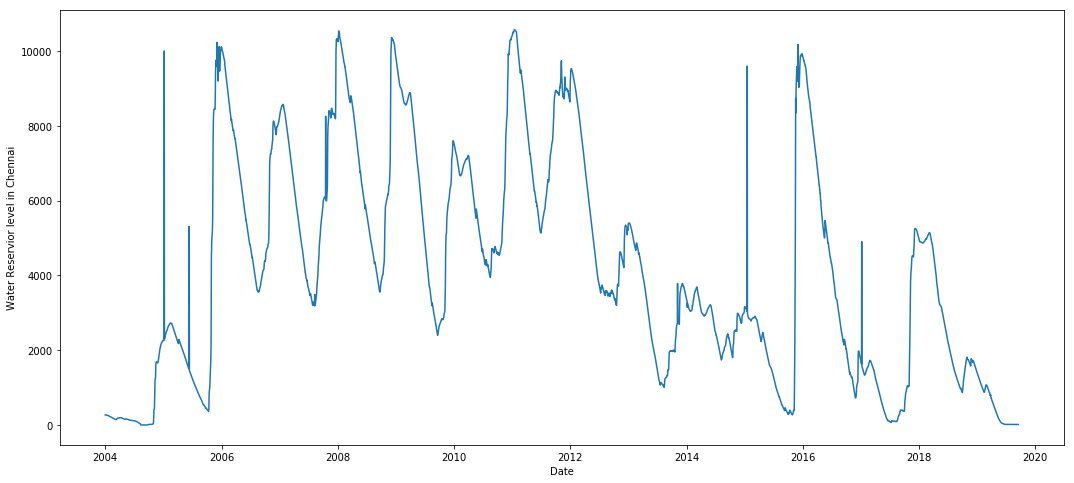

In [7]:
plt.xlabel("Date")
plt.ylabel("Water Reservior level in Chennai")
plt.plot(indexDataset['Total'])

## Plotting the dataset to check the different components of time series

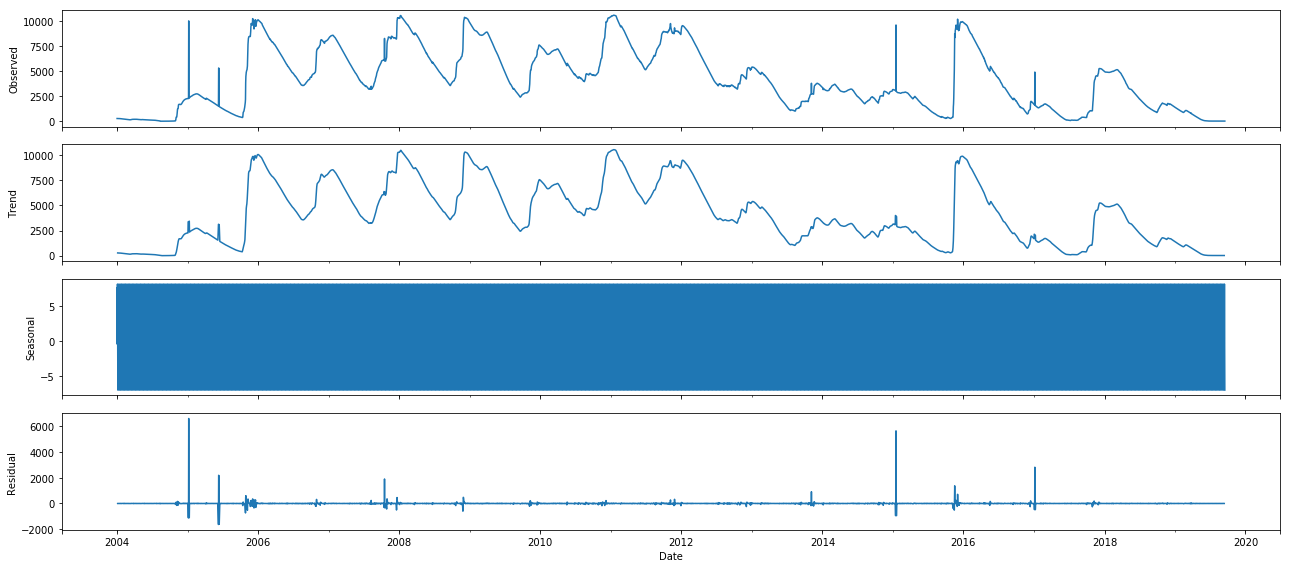

In [6]:
import statsmodels.api as sm
import matplotlib
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(indexDataset['Total'], model='additive')
fig = decomposition.plot()
plt.show()

## To Make the dataset stationary

In [8]:
indexDataset.shift(1)
indexed_diff = indexDataset.diff(periods=1)
indexed_diff = indexed_diff[1:]
indexed_diff.head()

,Total
Date,
2004-01-02,0.0
2004-01-03,-1.0
2004-01-04,0.0
2004-01-05,-0.1
2004-01-06,-1.0


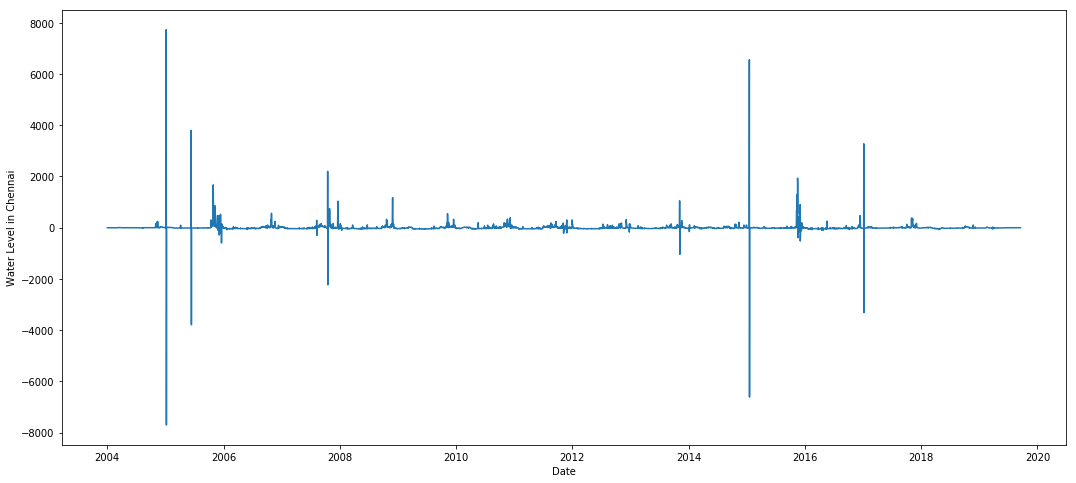

In [9]:
plt.xlabel("Date")
plt.ylabel("Water Level in Chennai")
plt.plot(indexed_diff['Total'])

## AR Model Implementation

In [10]:
from sklearn.model_selection import train_test_split 

X = indexed_diff['Total'].values
train = X[0:5000]# train data
test = X[5000:]                 
predictions = []

In [11]:
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
model_ar = AR(train)
model_ar_fit = model_ar.fit()

In [12]:
predictions = model_ar_fit.predict(start=5000,end=5736)

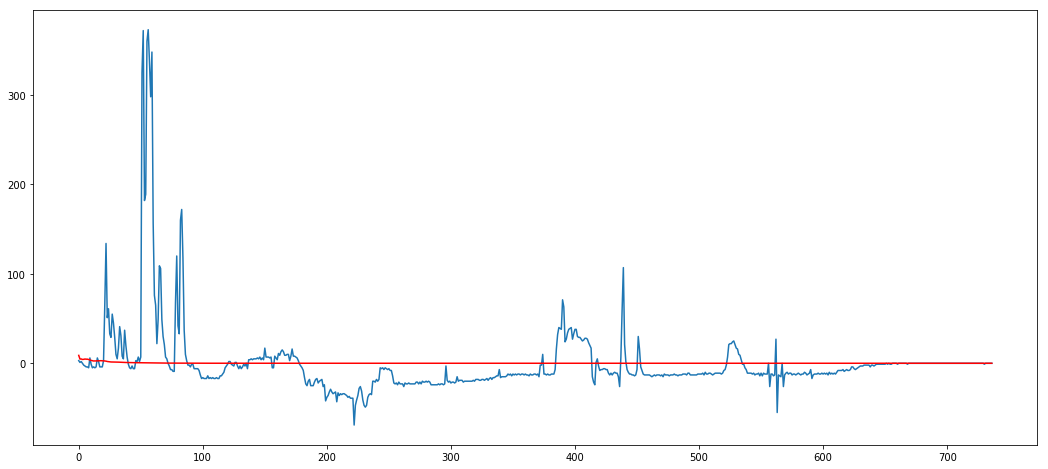

In [13]:
plt.plot(test)
plt.plot(predictions,color='red')

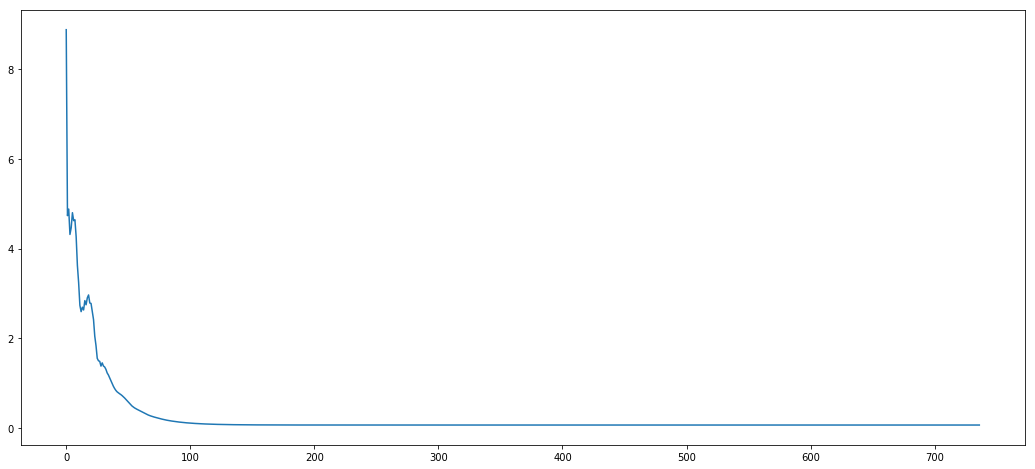

In [14]:
plt.plot(predictions)

In [15]:
mean_squared_error(test,predictions)

898.45

In [16]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test, predictions.round()))

0.7132084

## ARIMA Model implementation 

In [17]:
from statsmodels.tsa.arima_model import ARIMA

In [18]:
#p,d,q  p = periods taken for autoregressive model
#d -> Integrated order, difference
# q periods in moving average model
model_arima = ARIMA(train,order=(3,2, 3))
model_arima_fit = model_arima.fit()

C:\Users\smarty\AppData\Local\Programs\Python\Python37-32\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [19]:
predictions= model_arima_fit.forecast(steps=737)[0]
predictions

array([10.45288696,  6.63814845,  6.57262699,  6.79073265,  6.96826627,
        6.79037087,  6.86952058,  6.85237454,  6.86873447,  6.86424643,
        6.87455444,  6.87646157,  6.88250008,  6.88643677,  6.89155741,
        6.89600472,  6.90082187,  6.9054439 ,  6.91017322,  6.91484566,
        6.91955139,  6.92424101,  6.9289414 ,  6.93363796,  6.93833864,
        6.9430391 ,  6.94774171,  6.95244518,  6.95715021,  6.96185641,
        6.96656401,  6.97127287,  6.97598308,  6.98069458,  6.98540741,
        6.99012154,  6.99483699,  6.99955375,  7.00427183,  7.00899122,
        7.01371192,  7.01843393,  7.02315726,  7.0278819 ,  7.03260786,
        7.03733513,  7.04206371,  7.04679361,  7.05152482,  7.05625734,
        7.06099118,  7.06572633,  7.07046279,  7.07520057,  7.07993966,
        7.08468006,  7.08942178,  7.09416481,  7.09890915,  7.10365481,
        7.10840178,  7.11315006,  7.11789966,  7.12265057,  7.12740279,
        7.13215633,  7.13691118,  7.14166734,  7.14642482,  7.15

In [24]:
mean_squared_error(test,predictions)

360.114

In [21]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test, predictions.round()))

0.80375